# Study of the smearing matrices in the FGD

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
from dark_nus_utils import load_datasets
from const import alphaQED
from parameters_dict import mass_material

In [4]:
hierarchy = 'light'
D_or_M = 'dirac'
# distance = 'log'
# smoothing_pars = (0.1, 0.1)
# selection = 'carbon'

In [3]:
save_folder = f'../fig/3_fgd_smearing_matrices/'
!mkdir -p $save_folder

In [7]:
my_exp_analysis = load_datasets(hierarchy, D_or_M, timeit=True, dump=False, direct_load_objects=True)[f'{hierarchy}_{D_or_M}_FHC']

light dirac FHC
Wall time: 0.6126844882965088 s, CPU time: 0.5995552439999994
light dirac RHC
Wall time: 0.604731559753418 s, CPU time: 0.5967826350000003


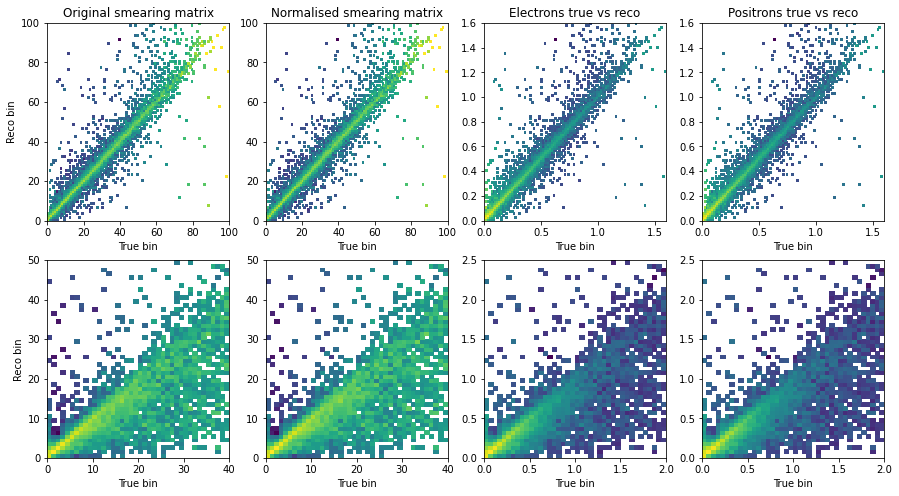

In [8]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs[0][0].pcolor(my_exp_analysis.smearing_theta.T, norm=LogNorm())
axs[0][0].set_title('Original smearing matrix')

axs[0][1].pcolor((my_exp_analysis.smearing_theta.T/my_exp_analysis.smearing_theta.sum(axis=1)), norm=LogNorm())
axs[0][1].set_title('Normalised smearing matrix')

axs[0][2].hist2d(my_exp_analysis.df_base['em_beam_theta'], my_exp_analysis.df_base['em_beam_theta_reco'], 
              bins=(my_exp_analysis.theta_binning_true, my_exp_analysis.theta_binning_reco), norm=LogNorm());
axs[0][2].set_title('Electrons true vs reco')

axs[0][3].hist2d(my_exp_analysis.df_base['ep_beam_theta'], my_exp_analysis.df_base['ep_beam_theta_reco'], 
              bins=(my_exp_analysis.theta_binning_true, my_exp_analysis.theta_binning_reco), norm=LogNorm());
axs[0][3].set_title('Positrons true vs reco')

for ax in axs[0]:
    ax.set_xlabel('True bin')
for ax in axs[1]:
    ax.set_xlabel('True bin')
axs[0][0].set_ylabel('Reco bin')
axs[1][0].set_ylabel('Reco bin')

axs[1][0].pcolor(my_exp_analysis.smearing_p.T, norm=LogNorm())
# axs[1][0].set_title('Original smearing matrix')

axs[1][1].pcolor((my_exp_analysis.smearing_p.T/my_exp_analysis.smearing_p.sum(axis=1)), norm=LogNorm())
# axs[1][1].set_title('Normalised smearing matrix')

axs[1][2].hist2d(my_exp_analysis.df_base['em_energy'], my_exp_analysis.df_base['em_energy_reco'], 
              bins=(my_exp_analysis.p_binning_true, my_exp_analysis.p_binning_reco), norm=LogNorm());
# axs[1][2].set_title('Electrons true vs reco')

axs[1][3].hist2d(my_exp_analysis.df_base['ep_energy'], my_exp_analysis.df_base['ep_energy_reco'], 
              bins=(my_exp_analysis.p_binning_true, my_exp_analysis.p_binning_reco), norm=LogNorm());
# axs[1][3].set_title('Positrons true vs reco')

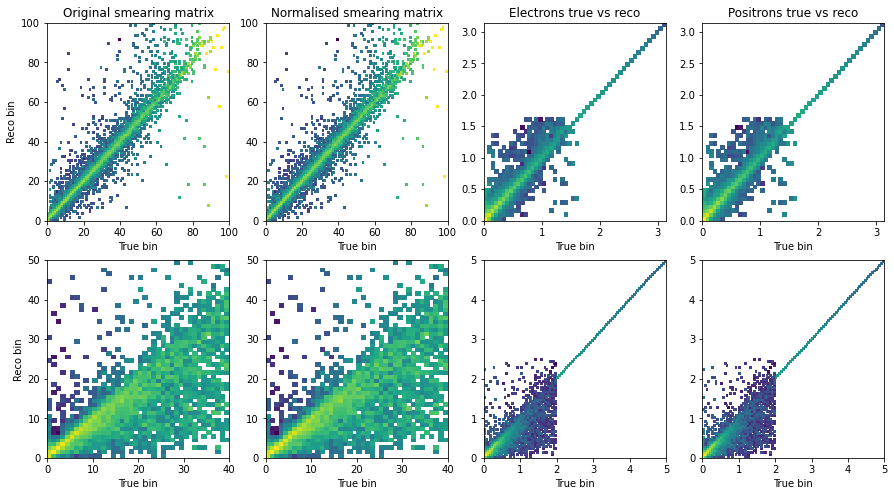

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs[0][0].pcolor(my_exp_analysis.smearing_theta.T, norm=LogNorm())
axs[0][0].set_title('Original smearing matrix')

axs[0][1].pcolor((my_exp_analysis.smearing_theta.T/my_exp_analysis.smearing_theta.sum(axis=1)), norm=LogNorm())
axs[0][1].set_title('Normalised smearing matrix')

axs[0][2].hist2d(my_exp_analysis.df_base['em_beam_theta'], my_exp_analysis.df_base['em_beam_theta_reco'], 
              bins=(50, 50), range=((0, np.pi), (0, np.pi)), norm=LogNorm());
axs[0][2].set_title('Electrons true vs reco')

axs[0][3].hist2d(my_exp_analysis.df_base['ep_beam_theta'], my_exp_analysis.df_base['ep_beam_theta_reco'], 
              bins=(50, 50), range=((0, np.pi), (0, np.pi)), norm=LogNorm());
axs[0][3].set_title('Positrons true vs reco')

for ax in axs[0]:
    ax.set_xlabel('True bin')
for ax in axs[1]:
    ax.set_xlabel('True bin')
axs[0][0].set_ylabel('Reco bin')
axs[1][0].set_ylabel('Reco bin')

axs[1][0].pcolor(my_exp_analysis.smearing_p.T, norm=LogNorm())
# axs[1][0].set_title('Original smearing matrix')

axs[1][1].pcolor((my_exp_analysis.smearing_p.T/my_exp_analysis.smearing_p.sum(axis=1)), norm=LogNorm())
# axs[1][1].set_title('Normalised smearing matrix')

out_m = axs[1][2].hist2d(my_exp_analysis.df_base['em_energy'], my_exp_analysis.df_base['em_energy_reco'], 
              bins=(100, 100), range=((0, 5), (0, 5)), norm=LogNorm());
# axs[1][2].set_title('Electrons true vs reco')

out_p = axs[1][3].hist2d(my_exp_analysis.df_base['ep_energy'], my_exp_analysis.df_base['ep_energy_reco'], 
              bins=(100, 100), range=((0, 5), (0, 5)), norm=LogNorm());
# axs[1][3].set_title('Positrons true vs reco')

Text(0, 0.5, 'Reco invariant mass [GeV]')

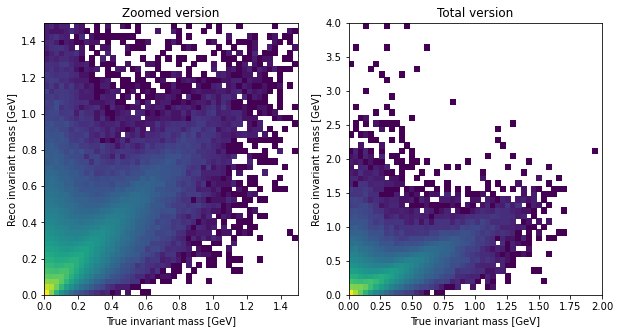

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].hist2d(my_exp_analysis.df_base['ee_mass'], my_exp_analysis.df_base['ee_mass_reco'], 
              bins=(50, 50), range=((0, 1.5), (0, 1.5)), norm=LogNorm());
axs[0].set_title('Zoomed version')
axs[0].set_xlabel('True invariant mass [GeV]')
axs[0].set_ylabel('Reco invariant mass [GeV]')
axs[1].hist2d(my_exp_analysis.df_base['ee_mass'], my_exp_analysis.df_base['ee_mass_reco'], 
              range=((0, 2), (0, 4)), bins=(50, 50), norm=LogNorm());
axs[1].set_title('Total version')
axs[1].set_xlabel('True invariant mass [GeV]')
axs[1].set_ylabel('Reco invariant mass [GeV]')

# plots for thesis

In [48]:
fsize = 12  
from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['computer modern roman', 'serif']
rcParams['figure.figsize'] = (1.2*3.7,1.2*2.3617)
rcParams['hatch.linewidth'] = 0.3
rcParams['axes.labelsize'] = fsize
rcParams['xtick.labelsize'] = fsize
rcParams['ytick.labelsize'] = fsize
rcParams['axes.titlesize'] = 10
rcParams['legend.frameon'] = False
rcParams['legend.fontsize'] = 0.8*fsize
rcParams['legend.loc'] = 'best'

In [71]:
def produce_smearing_matrix_normalised(true_values, reco_values, bins, range=None):
    fig = plt.figure(figsize=(4.44,4.44))
    axes_form = [0.15,0.15,0.82,0.74]
    ax = fig.add_axes(axes_form)
    
    H, xedges, yedges = np.histogram2d(true_values, reco_values, 
                                       bins=bins, range=range)
    H /= H.sum(axis=1)[..., np.newaxis]
    plt.pcolormesh(xedges, yedges, H.T, norm=LogNorm())
    plt.colorbar()

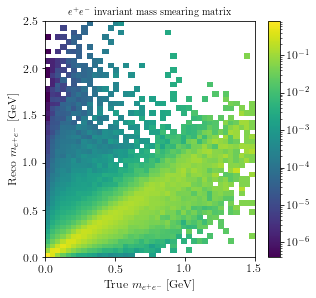

In [78]:
produce_smearing_matrix_normalised(my_exp_analysis.df_base['ee_mass'], my_exp_analysis.df_base['ee_mass_reco'], 
                                   bins=(40, 50), range=((0, 1.5), (0, 2.5)))
plt.xlabel('True $m_{e^+e^-}$ [GeV]')
plt.ylabel('Reco $m_{e^+e^-}$ [GeV]')
plt.title(r'$e^+e^-$ invariant mass smearing matrix')
plt.savefig(save_folder + 'inv_mass_smearing_matrix.pdf')

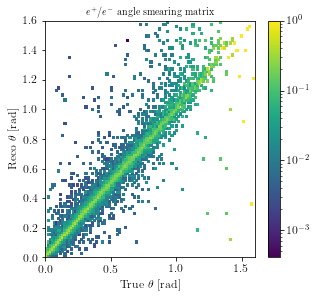

In [77]:
produce_smearing_matrix_normalised(my_exp_analysis.df_base['em_beam_theta'], my_exp_analysis.df_base['em_beam_theta_reco'], 
              bins=(my_exp_analysis.theta_binning_true, my_exp_analysis.theta_binning_reco))
plt.xlabel(r'True $\theta$ [rad]')
plt.ylabel(r'Reco $\theta$ [rad]')
plt.title(r'$e^+/e^-$ angle smearing matrix')
plt.savefig(save_folder + 'em_beam_theta_smearing_matrix.pdf')

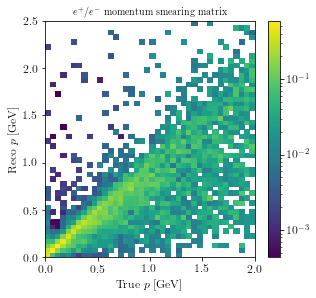

In [76]:
produce_smearing_matrix_normalised(my_exp_analysis.df_base['em_energy'], my_exp_analysis.df_base['em_energy_reco'], 
              bins=(my_exp_analysis.p_binning_true, my_exp_analysis.p_binning_reco))
plt.xlabel(r'True $p$ [GeV]')
plt.ylabel(r'Reco $p$ [GeV]')
plt.title(r'$e^+/e^-$ momentum smearing matrix')
plt.savefig(save_folder + 'em_p_smearing_matrix.pdf')